# Quanta crystal explanation

Erica Klarreich's [article](https://www.quantamagazine.org/mathematician-disproves-group-algebra-unit-conjecture-20210412/) on the unit conjecture at Quanta Magazine features a [graphic](https://sketchfab.com/3d-models/crystallographic-group-kaplansky-conjecture-d29b5c4f1655450fa114ce64ee013816) by Olena Shmahalo depicting the non-trivial unit found in a 3-dimensional crystallographic group referred to as $P$ in [my paper](https://arxiv.org/abs/2102.11818).
This group is the fundamental group of the flat manifold of Hantzsche–Wendt, which was shown not to have the unique product property by Promislow in a 1988 [paper](https://doi.org/10.1112/blms/20.4.302).

This notebook explains the graphic.
Here's an annotated screenshot:

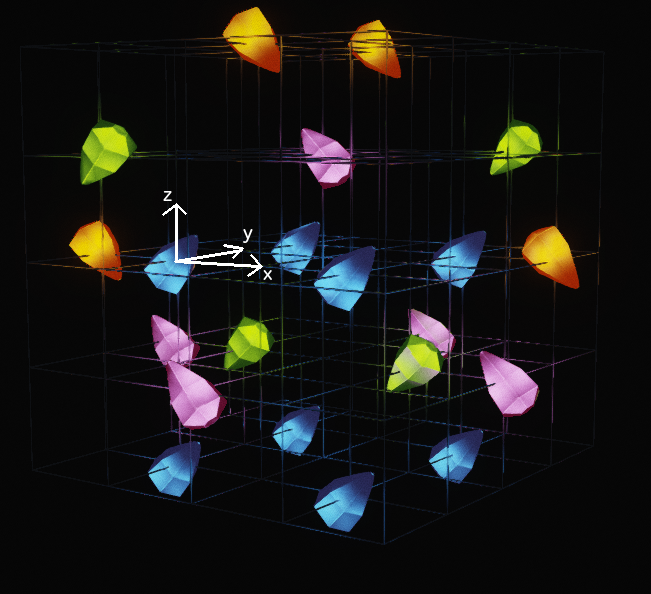

The group acts freely by isometries on $\mathbb{R}^3$ with compact quotient.
Fix the origin $O$ as a basepoint, so we can identify the group elements with points in space under the orbit map $g \mapsto g \cdot O$ (the orientation of the crystals is determined by how the group rotates space).
The generators are glide rotations in two orthogonal axes.
I took a non-standard choice of such an action so that the rotational symmetry of the 4 defining polynomials $p, q, r, s$ of the unit, which is part of the assumptions of Lemma 1 of the paper, are all realized as rotational symmetry about the vertical line $x=1/2, y=1/2$, as one can see in the figure.
That choice is the following

$$ a \cdot (x, y, z) = (x + 1/2, -y + 1, -z) $$

and

$$ b \cdot (x, y, z) = (-x, y + 1/2, -z - 1/2). $$

The abuse of notation here in overloading $x, y, z$ of the paper and $x, y, z$ of the coordinate axes is ok: if we perform $a$ twice, we translation by $1$ in the direction of the $x$-axis, and likewise for $b^2 = y$ and $(ab)^2 = z$.

To implement this action using a computer, we can use the standard trick of embedding $\operatorname{Aff}(\mathbb{R}^3) \hookrightarrow \operatorname{GL}(\mathbb{R}^4)$ as the stabilizer of $\mathbb{R}^3 \times \{1\}$, which gives

$$ a = \begin{pmatrix}1 & 0 & 0 & 1/2 \\ 0 & -1 & 0 & 1 \\ 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}, b = \begin{pmatrix} -1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 1/2 \\ 0 & 0 & -1 & -1/2 \\ 0 & 0 & 0 & 1 \end{pmatrix} $$

or in [GAP](https://www.gap-system.org/) code:

In [ ]:
a := [
    [ 1,  0,  0, 1/2 ],
    [ 0, -1,  0, 1   ],
    [ 0,  0, -1, 0   ],
    [ 0,  0,  0, 1   ],
];;
b := [
    [ -1, 0,  0,  0   ],
    [  0, 1,  0,  1/2 ],
    [  0, 0, -1, -1/2 ],
    [  0, 0,  0,  1   ],
];;


We can quickly check this really is a representation of the group $P = \langle a, b | b^{-1} a^2 b = a^{-2}, a^{-1} b^2 a = b^{-2} \rangle$ (this is just a sanity check and we won't show faithfulness of the representation).

In [4]:
b^-1 * a^2 * b * a^2;
a^-1 * b^2 * a * b^2;

[ [ 1, 0, 0, 0 ], [ 0, 1, 0, 0 ], [ 0, 0, 1, 0 ], [ 0, 0, 0, 1 ] ]

[ [ 1, 0, 0, 0 ], [ 0, 1, 0, 0 ], [ 0, 0, 1, 0 ], [ 0, 0, 0, 1 ] ]

Now let's define the "polynomials" $p, q, r, s$ (just as lists of matrices) and check what orbits they give.

In [ ]:
x := a^2;;
y := b^2;;
z := (a*b)^2;;
one := IdentityMat(4);;
p := [one, x, y, x*y, z^-1, x*z^-1, y*z^-1, x*y*z^-1];;
q := [x^-1*y^-1, x, y^-1*z, z];;
r := [one, x, y^-1*z, x*y*z];;
s := [one, x*z^-1, x^-1*z^-1, y*z^-1, y^-1*z^-1];;

Here's a helper function to get the image of $(0, 0, 0)$ under the affine action.

In [13]:
ImageOfOrigin := function(M)
    local v;
    v := M * [0, 0, 0, 1];
    return v{[1..3]};
end;;

In [14]:
# this is the blue cube {0, 1} x {0, 1} x {0, -1}
List(p, ImageOfOrigin);

[ [ 0, 0, 0 ], [ 1, 0, 0 ], [ 0, 1, 0 ], [ 1, 1, 0 ], [ 0, 0, -1 ], [ 1, 0, -1 ], [ 0, 1, -1 ], [ 1, 1, -1 ] ]

In [15]:
# these are the orange points
List(q*a, ImageOfOrigin);

[ [ -1/2, 0, 0 ], [ 3/2, 1, 0 ], [ 1/2, 0, 1 ], [ 1/2, 1, 1 ] ]

In [16]:
# these are the green points
List(r*b, ImageOfOrigin);

[ [ 0, 1/2, -1/2 ], [ 1, 1/2, -1/2 ], [ 0, -1/2, 1/2 ], [ 1, 3/2, 1/2 ] ]

In [17]:
# these are the pink points
List(s*a*b, ImageOfOrigin);

[ [ 1/2, 1/2, 1/2 ], [ 3/2, 1/2, -1/2 ], [ -1/2, 1/2, -1/2 ], [ 1/2, 3/2, -1/2 ], [ 1/2, -1/2, -1/2 ] ]

Since we've got this far, let's verify that the unit really is a unit:

In [27]:
alpha := Concatenation(p, q*a, r*b, s*a*b);;
p_dash := x^-1 * (a^-1 * p * a);;;
q_dash := x^-1 * q;;
r_dash := y^-1 * r;;
s_dash := z^-1 * (a^-1 * s * a);;
alpha_dash := Concatenation(p_dash, q_dash*a, r_dash*b, s_dash*a*b);;
# this is all 441 products
product := List(Cartesian(alpha, alpha_dash), pair -> pair[1] * pair[2]);;
# collected gives pairs [element, number_of_occurences]
collected := Collected(product);;
collected_mod_2 := Filtered(collected, entry -> RemInt(entry[2], 2) = 1);

[ [ [ [ 1, 0, 0, 0 ], [ 0, 1, 0, 0 ], [ 0, 0, 1, 0 ], [ 0, 0, 0, 1 ] ], 17 ] ]

That is, $1$ occurs 17 times and every other product occurs an even number of times, so the product is $1$ over $\mathbb{F}_2$.